In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from simpledbf import Dbf5
from datetime import datetime
import os
import geopandas as gp
import shapely
import fiona
import folium as fol
%matplotlib inline
dbf = Dbf5('NPWS_Estate.dbf')
df = dbf.to_dataframe()
df.head()


,OBJECTID,NAME,NAME_SHORT,TYPE,IUCN,RES_NO,GAZ_DATE,VERDATE
0,1,Aberbaldie Nature Reserve,Aberbaldie NR,NATURE RESERVE,IA,N0902,2003-03-14,2022-03-31
1,2,Abercrombie Karst Conservation Reserve,Abercrombie KCR,KARST CONSERVATION RESERVE,III,N0350,1997-12-08,2022-03-31
2,3,Abercrombie River National Park,Abercrombie River NP,NATIONAL PARK,II,N0093,1995-12-22,2022-03-31
3,4,Abercrombie River State Conservation Area,Abercrombie River SCA,STATE CONSERVATION AREA,II,N1143,2010-05-21,2022-03-31
4,5,Adelyne CCA Zone 3 State Conservation Area,Adelyne CCAZ3 SCA,CCA ZONE 3 STATE CONSERVATION AREA,II,N1163,2011-01-01,2022-03-31


In [3]:
row_one = df.iloc[1]
#print(row_one)
print(row_one["NAME"])

Abercrombie Karst Conservation Reserve


In [4]:
list(dbf.columns)

['OBJECTID',
 'NAME',
 'NAME_SHORT',
 'TYPE',
 'IUCN',
 'RES_NO',
 'GAZ_DATE',
 'VERDATE']

<AxesSubplot:>

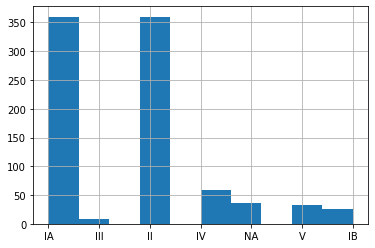

In [5]:
df["IUCN"].hist()

IUCN Category Meanings: 

Ia = Strict Nature Reserve

    Strictly protected for biodiversity and also possibly geological/ geomorphological features, where human visitation, use and impacts are controlled and limited to ensure protection of the conservation values

Ib = Wilderness Area

    Usually large unmodified or slightly modified areas, retaining their natural character and influence, without permanent or significant human habitation, protected and managed to preserve their natural condition

II = National Park

    Large natural or near-natural areas protecting large-scale ecological processes with characteristic species and ecosystems, which also have environmentally and culturally compatible spiritual, scientific, educational, recreational and visitor opportunities

III = Natural Monument or Feature

    Areas set aside to protect a specific natural monument, which can be a landform, sea mount, marine cavern, geological feature such as a cave, or a living feature such as an ancient grove

IV = Habitat/Species Management Area

    Areas to protect particular species or habitats, where management reflects this priority. Many will need regular, active interventions to meet the needs of particular species or habitats, but this is not a requirement of the category

V = Protected Landscape/Seascape

    Where the interaction of people and nature over time has produced a distinct character with significant ecological, biological, cultural and scenic value: and where safeguarding the integrity of this interaction is vital to protecting and sustaining the area and its associated nature conservation and other values

VI = Protected area with sustainable use of natural resources

    Areas which conserve ecosystems, together with associated cultural values and traditional natural resource management systems. Generally large, mainly in a natural condition, with a proportion under sustainable natural resource management and where low-level non-industrial natural resource use compatible with nature conservation is seen as one of the main aims


NR = (Not Reported) - For protected areas where an IUCN category is unknown and/or the data provider has not provided any related information.

NA = (Not Applicable) - Denotes an area that does not meet the NRS criteria or the IUCN definition of a protected area but has management complimentary to the NRS.

NAS = (Not Assigned) - The protected area meets the standard definition of protected areas but the data provider has chosen not to use the IUCN Protected Area Management Categories.

<AxesSubplot:>

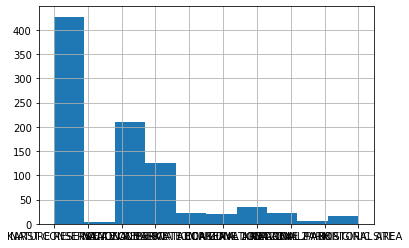

In [6]:
df["TYPE"].hist()

<AxesSubplot:>

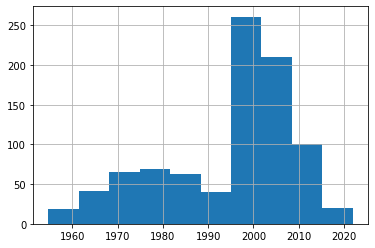

In [7]:
df["GAZ_DATE"].hist()

In [8]:
df["TYPE"].value_counts()

NATURE RESERVE                        427
NATIONAL PARK                         210
STATE CONSERVATION AREA               126
CCA ZONE 1 NATIONAL PARK               34
CCA ZONE 3 STATE CONSERVATION AREA     23
REGIONAL PARK                          22
ABORIGINAL AREA                        21
HISTORIC SITE                          16
CCA ZONE 2 ABORIGINAL AREA              5
KARST CONSERVATION RESERVE              4
Name: TYPE, dtype: int64

Kart Conservation reserves are all the protected caves within NSW. It's kinda crazy how there's only 4 protected caves in all of NSW. Might explore this revelation. However, Aboriginal Areas are pretty abysmal too, with a total of 26 protected areas, with only 5 of them. CCAs are places that are de-facto controlled by the community. Nature Reserves differ to National Parks as the primary reason for a NR is for research, while NPs are used for recreation to the general public,although nature reserves still allow visitors, its just not as encouraged.

In [9]:
df["IUCN"].value_counts()

II     360
IA     359
IV      58
NA      37
V       32
IB      25
III      9
Name: IUCN, dtype: int64

In [10]:
df["GAZ_DATE"].value_counts()

1999-01-01    81
2001-01-01    72
2005-12-01    53
2003-01-01    48
1999-03-05    29
              ..
1954-12-03     1
1984-03-30     1
1988-03-18     1
2009-03-27     1
1982-01-22     1
Name: GAZ_DATE, Length: 333, dtype: int64

In [12]:
df["VERDATE"].value_counts()

2022-03-31    888
Name: VERDATE, dtype: int64

It seems something significant happened on 1999-01-01, 2001-01-01, 2005-12-01 and 2003-01-01 to warrant them having to register that many places in one day. Maybe government protocol forces them to push it all towards a new year? Why are the 3 out of the 4 on the first of January of certain years? may be interesting to investigate this.

In [ ]:
df.groupby("TYPE").mean()

,OBJECTID
TYPE,
ABORIGINAL AREA,442.238095
CCA ZONE 1 NATIONAL PARK,475.294118
CCA ZONE 2 ABORIGINAL AREA,427.000000
CCA ZONE 3 STATE CONSERVATION AREA,411.695652
HISTORIC SITE,500.875000
KARST CONSERVATION RESERVE,332.000000
NATIONAL PARK,435.690476
NATURE RESERVE,444.203747
REGIONAL PARK,516.363636


In [ ]:
date = df["GAZ_DATE"]
list_of_parks_in_1999 = []
count = 0
for x in date:
    count += 1
    #print(str(x) + ": " + str(count))
    if str(x) == "1999-01-01":
        list_of_parks_in_1999.append(count)
for num in list_of_parks_in_1999:
    print(df.iloc[num-1])



OBJECTID                           16
NAME          Baalijin Nature Reserve
NAME_SHORT                Baalijin NR
TYPE                   NATURE RESERVE
IUCN                               IA
RES_NO                          N0735
GAZ_DATE                   1999-01-01
VERDATE                    2022-03-31
Name: 15, dtype: object
OBJECTID                             18
NAME          Back River Nature Reserve
NAME_SHORT                Back River NR
TYPE                     NATURE RESERVE
IUCN                                 IA
RES_NO                            N0727
GAZ_DATE                     1999-01-01
VERDATE                      2022-03-31
Name: 17, dtype: object
OBJECTID                            20
NAME          Bago Bluff National Park
NAME_SHORT               Bago Bluff NP
TYPE                     NATIONAL PARK
IUCN                                II
RES_NO                           N0114
GAZ_DATE                    1999-01-01
VERDATE                     2022-03-31
Name: 19, dtype:

In [ ]:
print(df["IUCN"])

0       IA
1      III
2       II
3       II
4       II
      ... 
883     IA
884     II
885     NA
886     II
887     II
Name: IUCN, Length: 888, dtype: object


<AxesSubplot:>

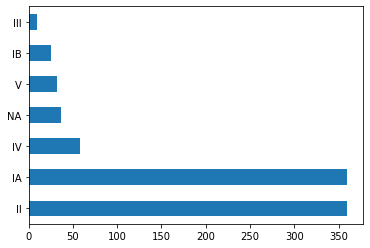

In [ ]:
df["IUCN"].value_counts().plot(kind = "barh")


<AxesSubplot:>

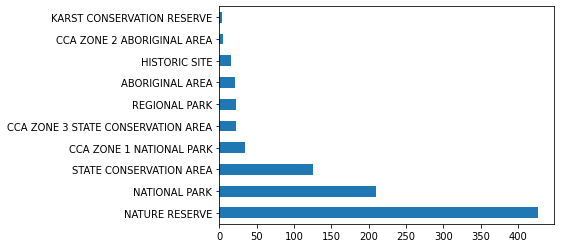

In [ ]:
df["TYPE"].value_counts().plot(kind = "barh")

In [ ]:
list_of_noticable_dates = []
count = 0
for i in df["GAZ_DATE"].value_counts():
    if i > 10:
        list_of_noticable_dates.append(df.iloc[count])
    count += 1
print (list_of_noticable_dates)



[OBJECTID                              1
NAME          Aberbaldie Nature Reserve
NAME_SHORT                Aberbaldie NR
TYPE                     NATURE RESERVE
IUCN                                 IA
RES_NO                            N0902
GAZ_DATE                     2003-03-14
VERDATE                      2022-03-31
Name: 0, dtype: object, OBJECTID                                           2
NAME          Abercrombie Karst Conservation Reserve
NAME_SHORT                           Abercrombie KCR
TYPE                      KARST CONSERVATION RESERVE
IUCN                                             III
RES_NO                                         N0350
GAZ_DATE                                  1997-12-08
VERDATE                                   2022-03-31
Name: 1, dtype: object, OBJECTID                                    3
NAME          Abercrombie River National Park
NAME_SHORT               Abercrombie River NP
TYPE                            NATIONAL PARK
IUCN                   

<AxesSubplot:>

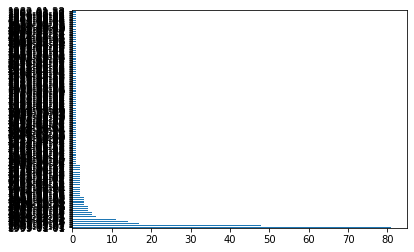

In [ ]:
df["GAZ_DATE"].value_counts().plot(kind = "barh")

In [ ]:
type_of_national_park = df["TYPE"]
list_of_karst_parks = []
names_of_karst_parks = []
count = 0
for x in type_of_national_park:
    count += 1
    #print(str(x) + ": " + str(count))
    if str(x) == "KARST CONSERVATION RESERVE":
        list_of_karst_parks.append(count)
        names_of_karst_parks.append(df.iloc[count-1]["NAME"])

for num in list_of_karst_parks:
    print(df.iloc[num-1])
print(list_of_karst_parks)
print(names_of_karst_parks)

OBJECTID                                           2
NAME          Abercrombie Karst Conservation Reserve
NAME_SHORT                           Abercrombie KCR
TYPE                      KARST CONSERVATION RESERVE
IUCN                                             III
RES_NO                                         N0350
GAZ_DATE                                  1997-12-08
VERDATE                                   2022-03-31
Name: 1, dtype: object
OBJECTID                                      105
NAME          Borenore Karst Conservation Reserve
NAME_SHORT                           Borenore KCR
TYPE                   KARST CONSERVATION RESERVE
IUCN                                          III
RES_NO                                      N0353
GAZ_DATE                               1997-12-08
VERDATE                                2022-03-31
Name: 104, dtype: object
OBJECTID                                     381
NAME          Jenolan Karst Conservation Reserve
NAME_SHORT                    

In [32]:
shp_file_name = "tenure_npws_estate/NPWS_Estate.shp"
parks = gp.geopandas.read_file(shp_file_name)
lga = gp.geopandas.read_file("NOV21_NSW_LGA_POLYGON_shp/nsw_lga.shp")

<AxesSubplot:>

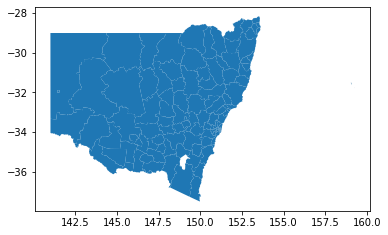

In [36]:
lga.plot()

In [ ]:
print(parks.iloc[1])

OBJECTID                                                      2
NAME                     Abercrombie Karst Conservation Reserve
NAME_SHORT                                      Abercrombie KCR
TYPE                                 KARST CONSERVATION RESERVE
IUCN                                                        III
RES_NO                                                    N0350
GAZ_DATE                                             1997-12-08
VERDATE                                              2022-06-30
geometry      POLYGON ((149.3779532632409 -33.85695514948742...
Name: 1, dtype: object


OBJECTID                                                     10
NAME                                      Arakoon National Park
NAME_SHORT                                           Arakoon NP
TYPE                                              NATIONAL PARK
IUCN                                                         II
RES_NO                                                    N1174
GAZ_DATE                                             2010-12-10
VERDATE                                              2022-06-30
geometry      (POLYGON ((153.06857456199998 -30.888034935399...
Name: 9, dtype: object


c:\Users\yello\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
c:\Users\yello\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
c:\Users\yello\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a mu

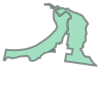

In [ ]:
a = parks.iloc[9]
print(a)
a.geometry

C:\Users\yello\AppData\Local\Temp\ipykernel_3552\442847790.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks[karst_geos].centroid.plot(ax = ax, color = "orange")


<AxesSubplot:>

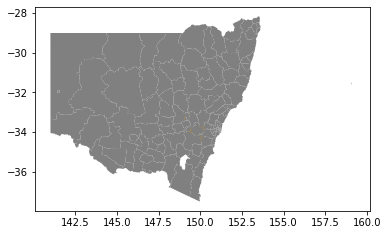

In [42]:

fig, ax = plt.subplots(1,1)
karst_geos = parks["TYPE"].astype(str) == "KARST CONSERVATION RESERVE"
parks[karst_geos].centroid.plot(ax = ax, color = "orange")

lga.plot(ax = ax, color = "grey")

C:\Users\yello\AppData\Local\Temp\ipykernel_3552\2151912420.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks.centroid.plot(ax = ax)
C:\Users\yello\AppData\Local\Temp\ipykernel_3552\2151912420.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks[parks_made_in_1999_geo].centroid.plot(ax = ax, color = "red")


<AxesSubplot:>

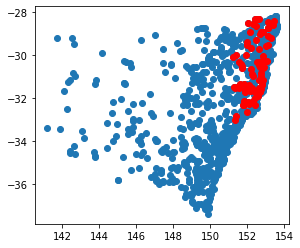

In [34]:
fig, ax = plt.subplots(1,1)
parks.centroid.plot(ax = ax)
parks_made_in_1999_geo = parks["GAZ_DATE"].astype(str) == "1999-01-01"
parks[parks_made_in_1999_geo].centroid.plot(ax = ax, color = "red")

C:\Users\yello\AppData\Local\Temp\ipykernel_3552\3867975378.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks[parks_made_in_1999_geo].centroid.plot(ax = ax, color = "red")


<AxesSubplot:>

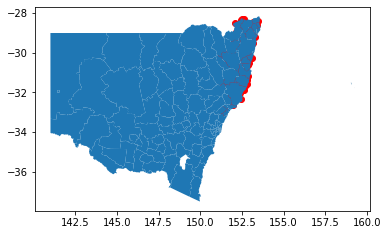

In [35]:
fig, ax = plt.subplots(1,1)
parks_made_in_1999_geo = parks["GAZ_DATE"].astype(str) == "1999-01-01"
parks[parks_made_in_1999_geo].centroid.plot(ax = ax, color = "red")
lga.plot(ax = ax)

In [ ]:
df.shape

(888, 8)